# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import date, timedelta

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
def get_price_alternative(id_,url_):
    
    # Execute get request
    requests.get(url_)

    # Execute GET request and store response
    response_data = requests.get(url_)

    # Get content
    response_content = response_data.content

    # Formatting as json
    data = response_data.json()

    price = data["data"][id_]["quotes"]["USD"]["price"]

    return price

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
btc_price = get_price_alternative("1",btc_url)

# Fetch current ETH price
eth_price = get_price_alternative("1027",eth_url)

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")

The current value of your 1.2 BTC is $27,802.80
The current value of your 5.3 ETH is $8,074.92


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
#Closest date to day based on Alpaca Liscense
today_date = str(date.today() - timedelta(days=50))

# Format current date as ISO format
today = pd.Timestamp(today_date,tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current price data from Alpaca
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portfolio


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-06-01 04:00:00+00:00,103.39,103.525,102.75,102.86,8050247,29175,102.948426,AGG
2022-06-01 04:00:00+00:00,415.20,416.240,406.93,409.59,86017100,693194,410.787476,SPY


In [10]:

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

# Preview DataFrame
df_portfolio

SPY                                    \
                            open    high     low   close    volume   
timestamp                                                            
2022-06-01 04:00:00+00:00  415.2  416.24  406.93  409.59  86017100   

                                                      AGG                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2022-06-01 04:00:00+00:00      693194  410.787476  103.39  103.525  102.75   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-06-01 04:00:00+00:00  102.86  8050247       29175  102.948426

In [11]:
# Pick AGG and SPY close prices
spy_close_price= float(df_portfolio["SPY"]["close"])
agg_close_price = float(df_portfolio["AGG"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $102.86
Current SPY closing price: $409.59


In [12]:
# Compute the current value of shares
my_agg_value =  agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")

The current value of your 50 SPY shares is $20,479.50
The current value of your 200 AGG shares is $20,572.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

crypto_val = my_btc_value + my_eth_value
share_val = (spy_close_price * my_spy) + (agg_close_price * my_agg)

# Consolidate financial assets data
df_savings = {"amount" : 
              {"crypto" : crypto_val,
               "shares" : share_val
              }
            }
# Create savings DataFrame
df_savings = pd.DataFrame.from_dict(df_savings)

# Display savings DataFrame
display(df_savings)

,amount
crypto,35877.721
shares,41051.500


<AxesSubplot:title={'center':'Crypto & Stocks Savings Portfolio Composition'}, ylabel='amount'>

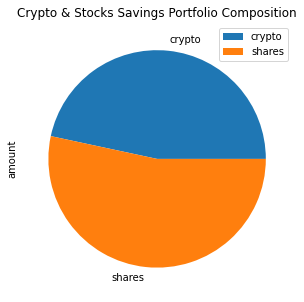

In [14]:
# Plot savings pie chart
df_savings.plot.pie(figsize = (10,5),y="amount", title="Crypto & Stocks Savings Portfolio Composition")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = share_val + crypto_val

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations, you are a baller! Your emergency fund is ${emergency_fund:,.0f} while your portfolio value is ${crypto_val + share_val :,.2f}")
if total_savings == emergency_fund:
    print("Congratulations, you scored your financial goal! Keep up the good work")
if total_savings < emergency_fund:
    funds_needed = emergency_fund - total_savings
    print(f"Warning, you need another {funds_needed} to go before you can rest easy")

Congratulations, you are a baller! Your emergency fund is $36,000 while your portfolio value is $76,929.22


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
#Gather 5 years of historical price data (+50 days for Alpacca Allowable Call Dates) 
starting_date = str(date.today() - timedelta(days=1873))

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp(starting_date, tz="America/New_York").isoformat()
end_date = pd.Timestamp(today_date, tz="America/New_York").isoformat()


# Get 5 year's worth of historical price data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_stock_data.sample(2)

SPY                                     \
                             open     high     low   close    volume   
timestamp                                                              
2021-05-20 04:00:00+00:00  411.77  416.625  411.67  415.28  78034807   
2019-07-25 04:00:00+00:00  300.97  301.000  299.11  300.00  55864213   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2021-05-20 04:00:00+00:00      483772  414.360499  114.08  114.30  114.0800   
2019-07-25 04:00:00+00:00      266901  300.079179  111.33  111.33  111.0474   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2021-05-20 04:00:00+00:00  114.29  6243292       18481  114.240783  
2019-07-25 04:00:00+00:00  111.19  2977486       11325  111.190464

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-06-05 04:00:00+00:00  244.02  244.30  243.76  243.99   44698825   
2017-06-06 04:00:00+00:00  243.34  243.98  243.12  243.21   50375430   
2017-06-07 04:00:00+00:00  243.61  243.92  242.83  243.66   54144311   
2017-06-08 04:00:00+00:00  243.80  244.33  243.17  243.78   65950691   
2017-06-09 04:00:00+00:00  244.07  245.01  241.95  243.41  132256362   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-06-05 04:00:00+00:00      136071  244.029429          NaN  109.66   
2017-06-06 04:00:00+00:00      160561  243.517742    -0.003197  109.87   
2017-06-07 04:00:00+00:00      182098  243.535814     0.001850  109.81   
2017-06-08 04:00:00+00:00      210451  243.697117     0.000492  109.70   
2017-06-09 04:00:00+00:00      430463  243.643527    -0.001518  109.51   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2017-06-05 04:00:00+00:00  109.74  109.6000  109.67  2450624        9907   
2017-06-06 04:00:00+00:00  109.95  109.8100  109.89  1607846        8264   
2017-06-07 04:00:00+00:00  109.87  109.7000  109.76  1903624        9268   
2017-06-08 04:00:00+00:00  109.70  109.5101  109.65  1532737        8301   
2017-06-09 04:00:00+00:00  109.63  109.4600  109.56  1616833        8395   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-06-05 04:00:00+00:00  109.693010          NaN  
2017-06-06 04:00:00+00:00  109.897602     0.002006  
2017-06-07 04:00:00+00:00  109.768804    -0.001183  
2017-06-08 04:00:00+00:00  109.622036    -0.001002  
2017-06-09 04:00:00+00:00  109.536583    -0.000821

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\sydneyaudiovisualsup\Documents\FinTech\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001577,1.007093,1.006629,1.007279,1.005132,1.001919,0.987706,0.997994,0.991469,0.992092,...,1.005004,0.997954,0.998078,0.995435,1.008417,1.003347,1.002281,1.001950,0.997728,1.003041
2,1.004240,1.015288,0.998598,1.010050,0.999610,0.989989,0.993723,0.997550,0.988663,0.981884,...,1.008882,0.990983,1.003172,1.001094,1.015424,1.002175,0.990691,1.001484,0.993960,0.999952
3,1.007241,1.022902,0.991893,1.021770,0.998281,0.989328,1.002835,0.994284,0.996251,0.975182,...,1.012694,0.976640,1.005187,1.006232,1.025596,1.005094,0.986725,1.006352,0.990331,0.995872
4,1.017526,1.033482,0.993140,1.027595,0.993734,0.982305,1.003505,1.002816,0.999210,0.979669,...,1.016490,0.976520,1.007735,1.003557,1.018870,1.010313,0.971809,1.002044,0.992082,0.998887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.511721,2.483996,3.534395,3.392522,2.417470,1.772074,4.165741,3.624276,6.288676,3.927503,...,3.871949,2.849346,4.009282,4.169176,2.731816,5.077231,1.870189,1.655945,2.799260,3.962976
7557,2.498325,2.484870,3.526750,3.390688,2.431679,1.771120,4.189793,3.627323,6.268287,3.935193,...,3.843895,2.861450,4.007431,4.168380,2.736397,5.076295,1.878425,1.652108,2.804686,3.947833
7558,2.490265,2.464594,3.497847,3.395788,2.443695,1.779707,4.188256,3.625907,6.272074,3.930676,...,3.836108,2.877216,4.054211,4.139204,2.745340,5.071545,1.871449,1.647093,2.795155,3.949607
7559,2.472288,2.480530,3.480636,3.406618,2.430635,1.787269,4.166061,3.632750,6.285153,3.954152,...,3.815793,2.886883,4.099088,4.153468,2.759478,5.075634,1.888729,1.647540,2.794284,3.968868


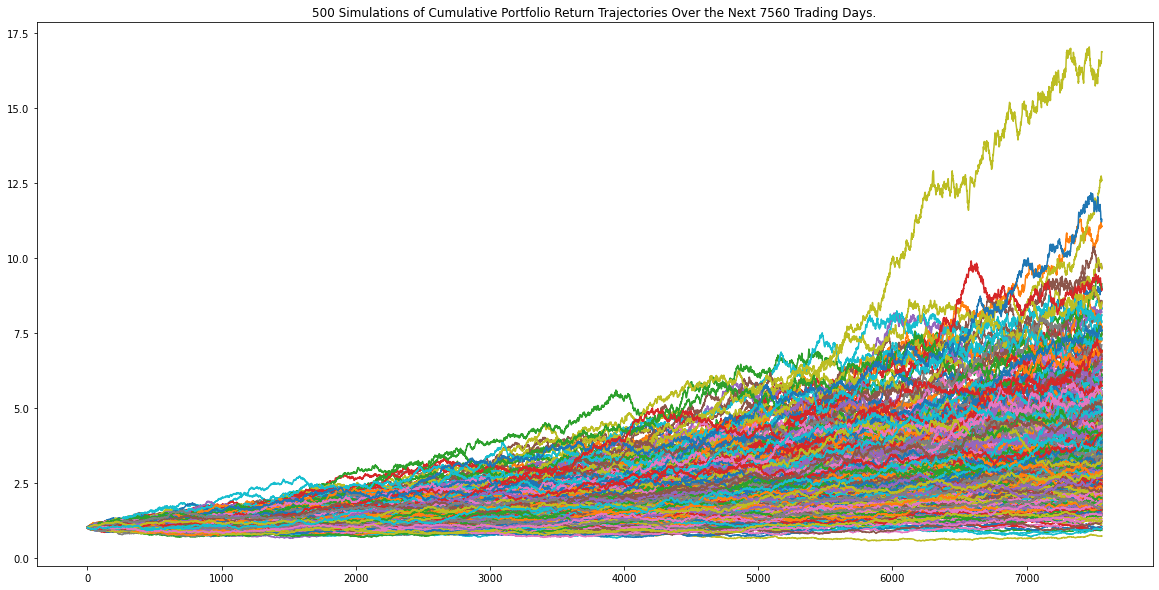

In [20]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

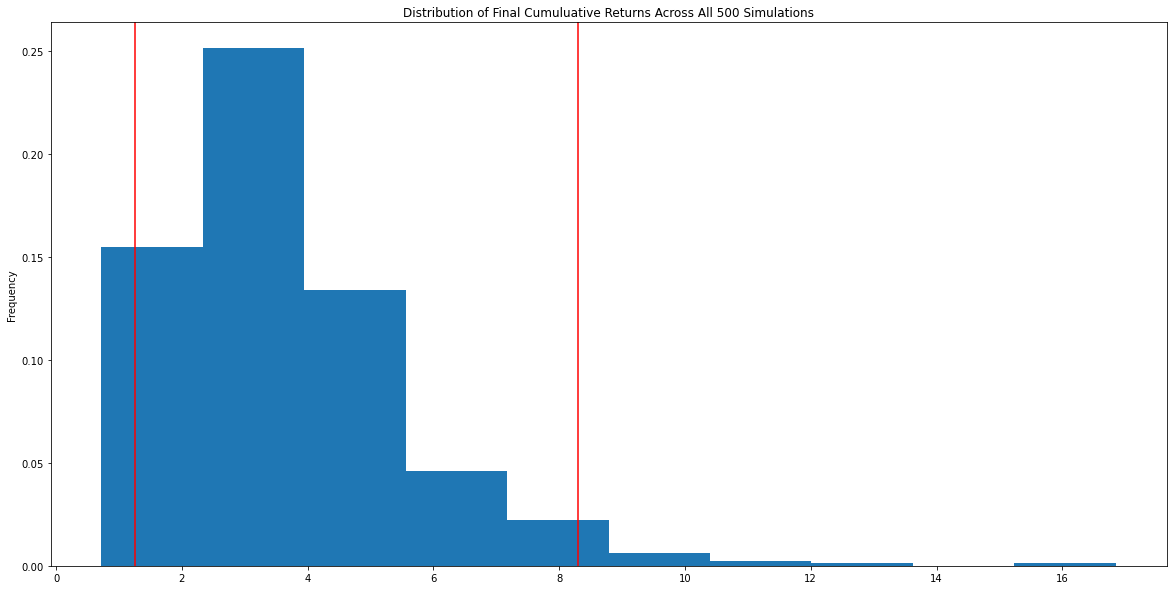

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.646405
std               1.889059
min               0.717979
25%               2.330027
50%               3.244816
75%               4.453903
max              16.851926
95% CI Lower      1.261589
95% CI Upper      8.303730
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $25231.78 and $166074.59


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $37847.66 and $249111.89


## Optional Challenge - Early Retirement


### Five Years Retirement Option with higher risk and initial investment

In [25]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*5
)
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()


SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-06-05 04:00:00+00:00  244.02  244.30  243.76  243.99   44698825   
2017-06-06 04:00:00+00:00  243.34  243.98  243.12  243.21   50375430   
2017-06-07 04:00:00+00:00  243.61  243.92  242.83  243.66   54144311   
2017-06-08 04:00:00+00:00  243.80  244.33  243.17  243.78   65950691   
2017-06-09 04:00:00+00:00  244.07  245.01  241.95  243.41  132256362   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-06-05 04:00:00+00:00      136071  244.029429          NaN  109.66   
2017-06-06 04:00:00+00:00      160561  243.517742    -0.003197  109.87   
2017-06-07 04:00:00+00:00      182098  243.535814     0.001850  109.81   
2017-06-08 04:00:00+00:00      210451  243.697117     0.000492  109.70   
2017-06-09 04:00:00+00:00      430463  243.643527    -0.001518  109.51   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2017-06-05 04:00:00+00:00  109.74  109.6000  109.67  2450624        9907   
2017-06-06 04:00:00+00:00  109.95  109.8100  109.89  1607846        8264   
2017-06-07 04:00:00+00:00  109.87  109.7000  109.76  1903624        9268   
2017-06-08 04:00:00+00:00  109.70  109.5101  109.65  1532737        8301   
2017-06-09 04:00:00+00:00  109.63  109.4600  109.56  1616833        8395   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-06-05 04:00:00+00:00  109.693010          NaN  
2017-06-06 04:00:00+00:00  109.897602     0.002006  
2017-06-07 04:00:00+00:00  109.768804    -0.001183  
2017-06-08 04:00:00+00:00  109.622036    -0.001002  
2017-06-09 04:00:00+00:00  109.536583    -0.000821

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\sydneyaudiovisualsup\Documents\FinTech\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.984434,1.006368,0.991100,0.986852,0.998538,0.997025,1.010780,1.007370,1.009834,0.995833,...,0.981574,0.990572,1.009581,1.000744,1.006192,1.003834,0.994581,0.998150,0.995196,1.008638
2,0.964784,0.989950,0.993367,0.989989,1.009270,0.986380,1.013086,1.016908,1.009453,0.981317,...,0.987867,0.983814,1.008379,1.010306,1.031923,0.988695,1.009753,1.010275,0.987313,1.027893
3,0.963691,0.978151,0.995034,0.995602,1.009186,0.987753,1.006174,1.023972,1.005131,0.982982,...,0.986807,0.961524,1.009849,1.002874,1.032054,0.986763,1.010834,1.005397,1.006894,1.043364
4,0.953318,0.986576,1.015874,0.998162,1.024312,0.998717,0.994759,1.027121,1.013969,0.980464,...,1.005430,0.965046,1.006694,1.013491,1.035677,0.983976,1.013153,1.013829,1.012604,1.021071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.818420,1.130031,1.171052,0.945019,1.830315,1.695743,1.778977,1.075817,1.619147,1.649753,...,0.670105,1.044784,1.165584,1.715732,1.347429,2.062336,1.138514,1.147593,1.688144,2.176430
1257,1.816766,1.125291,1.176613,0.939576,1.821354,1.693926,1.781926,1.075202,1.634500,1.651928,...,0.663106,1.049664,1.171153,1.740247,1.350326,2.089714,1.130636,1.144269,1.690171,2.155253
1258,1.808222,1.130494,1.182251,0.944353,1.838084,1.683973,1.776492,1.053859,1.654561,1.622368,...,0.652589,1.046960,1.175654,1.753540,1.367333,2.067071,1.138729,1.134823,1.676777,2.164808
1259,1.800554,1.143368,1.178084,0.941413,1.855812,1.708813,1.765297,1.062484,1.637250,1.626911,...,0.641329,1.035730,1.206771,1.767894,1.360774,2.101774,1.134963,1.098766,1.703889,2.158325


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

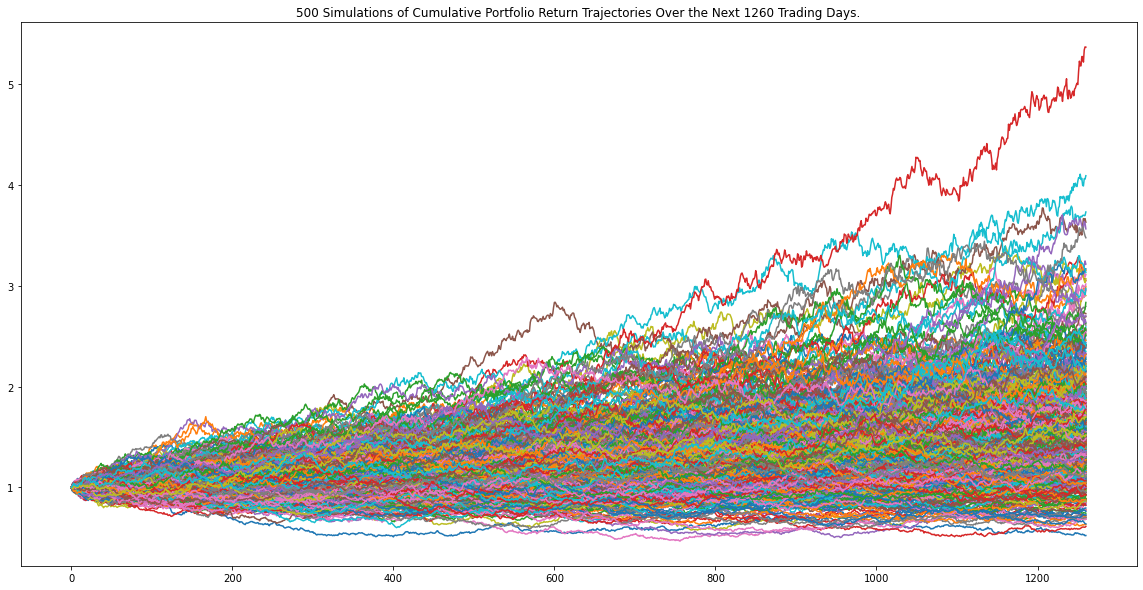

In [27]:
# Plot simulation outcomes
MC_fiveyear.plot_simulation()

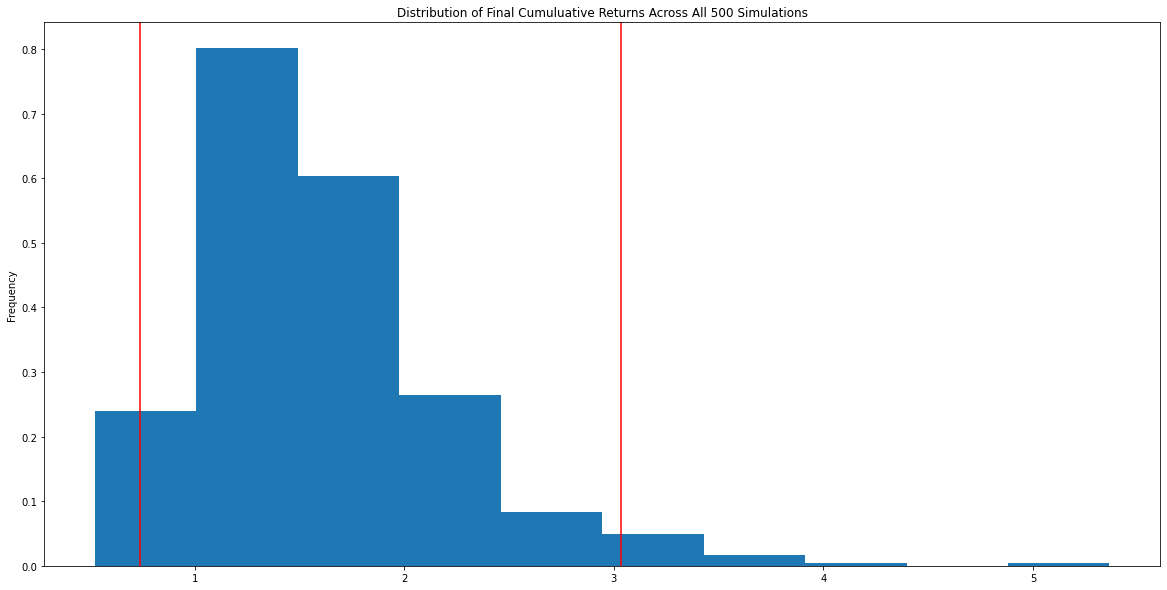

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()


In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.598662
std               0.583204
min               0.523384
25%               1.195380
50%               1.488836
75%               1.881919
max               5.364701
95% CI Lower      0.736391
95% CI Upper      3.033855
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $44183.44 and $182031.28


### Ten Years Retirement Option with high risk and 20K initial investment

In [31]:
def retirement_option(years,num_simulations,initial_investment,risk):


    # Configuring a Monte Carlo simulation to forecast x years cumulative returns
    MC_ = MCSimulation(
        portfolio_data = df_stock_data,
        weights = risk,
        num_simulation = num_simulations,
        num_trading_days = 252*years)

    # Running a Monte Carlo simulation
    MC_.calc_cumulative_return()

    # Plot probability distribution and confidence intervals
    dist_plot = MC_.plot_distribution()

    # Plot simulation outcomes
    line_plot = MC_.plot_simulation()

    # Fetch summary statistics from the Monte Carlo simulation results
    tbl = MC_.summarize_cumulative_return()

    # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
    ci_lower_five = round(tbl[8]*initial_investment,2)
    ci_upper_five = round(tbl[9]*initial_investment,2)

    # Print results
    print("\n")
    print("  ------  Results  ----------  \n\n")
    print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
        f" over the next 5 years will end within in the range of"
        f" ${ci_lower_five} and ${ci_upper_five}\n")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\sydneyaudiovisualsup\Documents\FinTech\financial_planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

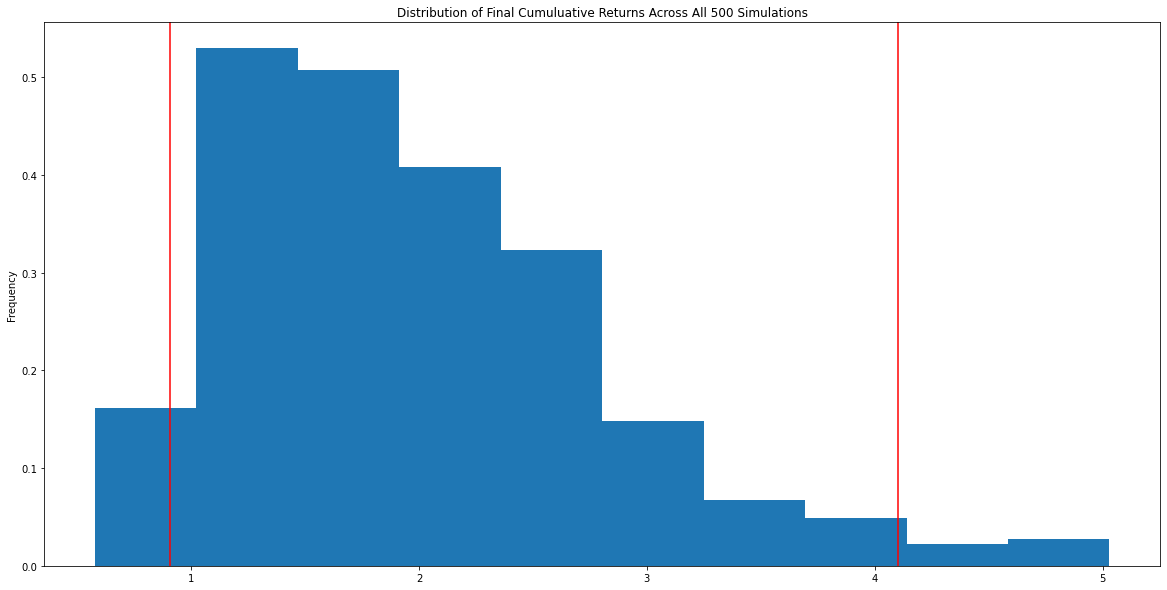

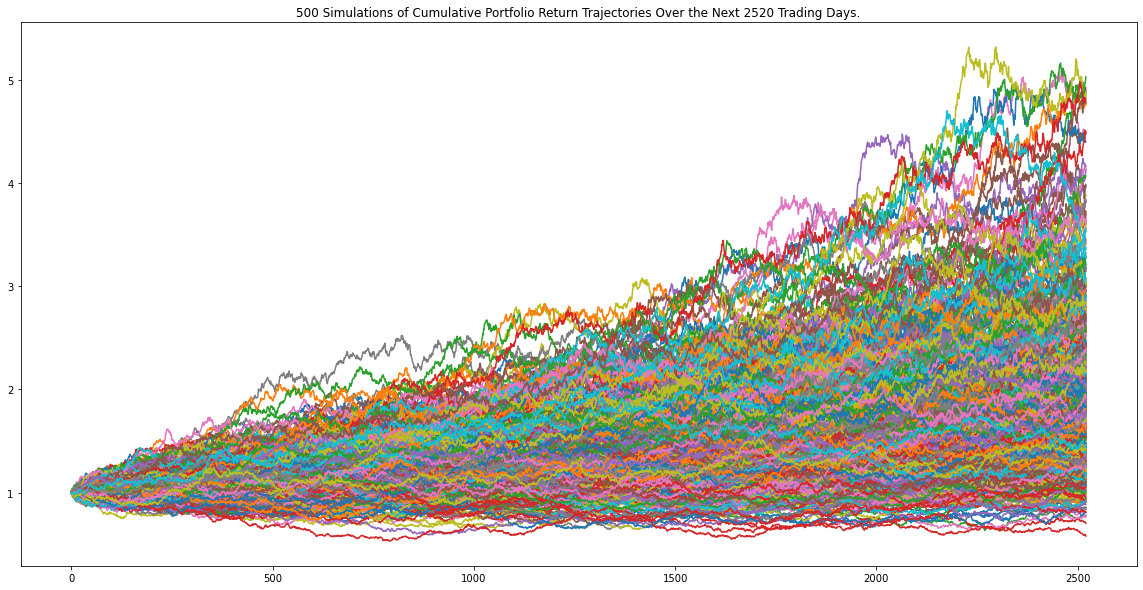

In [32]:
retirement_option(years=10,num_simulations=500,initial_investment = 20000,risk = [.60,.40])